In [22]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

### Moving Windows

In [23]:
tsla=pd.read_csv("TSLA.csv")  

In [24]:
# Indexing the date to plot a good time-series on the graph
tsla['Date'] = pd.to_datetime(tsla['Date'])
tsla.index = tsla['Date']
tsla.head()

,Date,Open,Close,High,Low,Volume
Date,,,,,,
2016-01-04,2016-01-04,230.720001,223.410004,231.380005,219.000000,6827100
2016-01-05,2016-01-05,226.360001,223.429993,226.889999,220.000000,3186800
2016-01-06,2016-01-06,220.000000,219.039993,220.050003,215.979996,3779100
2016-01-07,2016-01-07,214.190002,215.649994,218.440002,213.669998,3554300
2016-01-08,2016-01-08,217.860001,211.000000,220.440002,210.770004,3628100


In [25]:
# Short moving window rolling mean(simple moving average)
#tsla['42'] = tsla['Close'].rolling(window=42).mean()

# Long moving window rolling mean(simple moving average)
#tsla['252'] = tsla['Close'].rolling(window=252).mean()

# Plot the adjusted closing price, the short and long windows of rolling means
#tsla[['Close', '42', '252']].plot()

#plt.show()

# Building a Trading Strategy

In [27]:
# Initialize the short and long windows
short_window = 12
long_window = 26
macd_window = 9

# Initialize the `signals` DataFrame with the `signal` column
#signals = pd.DataFrame(index=tsla.index)
signals = tsla
signals['signal'] = 0.0

# Create short exponential moving average over the short window
signals['short_mavg'] = tsla['Close'].ewm(span=short_window, adjust=False).mean()

# Create long exponential moving average over the long window
signals['long_mavg'] = tsla['Close'].ewm(span=long_window, adjust=False).mean()

# Create macd exponential moving average over the macd window
signals['macd'] = signals['short_mavg'] - signals['long_mavg']

# Create macd exponential moving average over the macd window
signals['macd_signal_line'] = signals['macd'].ewm(span=macd_window, adjust=False).mean()

# Create macd exponential moving average over the macd window
signals['macd_Histogram'] = signals['macd'] - signals['macd_signal_line']

# Create signals
#signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] 
#                                            > signals['long_mavg'][short_window:], 1.0, 0.0) 

# Create signals
signals['signal'][short_window:] = np.where(signals['macd'][short_window:] 
                                            > signals['macd_signal_line'][short_window:], 1.0, 0.0) 


# Generate trading orders
signals['positions'] = signals['signal'].diff()

signals.head(100)

/Users/rishikadawkar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Date,Open,Close,High,Low,Volume,signal,short_mavg,long_mavg,macd,macd_signal_line,macd_Histogram,positions
Date,,,,,,,,,,,,,
2016-01-04,2016-01-04,230.720001,223.410004,231.380005,219.000000,6827100,0.0,223.410004,223.410004,0.000000,0.000000,0.000000,NaN
2016-01-05,2016-01-05,226.360001,223.429993,226.889999,220.000000,3186800,0.0,223.413079,223.411485,0.001595,0.000319,0.001276,0.0
2016-01-06,2016-01-06,220.000000,219.039993,220.050003,215.979996,3779100,0.0,222.740297,223.087670,-0.347374,-0.069220,-0.278154,0.0
2016-01-07,2016-01-07,214.190002,215.649994,218.440002,213.669998,3554300,0.0,221.649481,222.536731,-0.887251,-0.232826,-0.654425,0.0
2016-01-08,2016-01-08,217.860001,211.000000,220.440002,210.770004,3628100,0.0,220.011099,221.682159,-1.671060,-0.520473,-1.150587,0.0
2016-01-11,2016-01-11,214.009995,207.850006,214.449997,203.000000,4089700,0.0,218.140162,220.657555,-2.517393,-0.919857,-1.597536,0.0
2016-01-12,2016-01-12,211.600006,209.970001,213.740005,205.309998,3091900,0.0,216.883214,219.865884,-2.982670,-1.332419,-1.650251,0.0
2016-01-13,2016-01-13,212.009995,200.309998,212.649994,200.000000,4126400,0.0,214.333488,218.417300,-4.083812,-1.882698,-2.201114,0.0
2016-01-14,2016-01-14,202.210007,206.179993,210.000000,193.380005,6490700,0.0,213.079105,217.510833,-4.431728,-2.392504,-2.039224,0.0


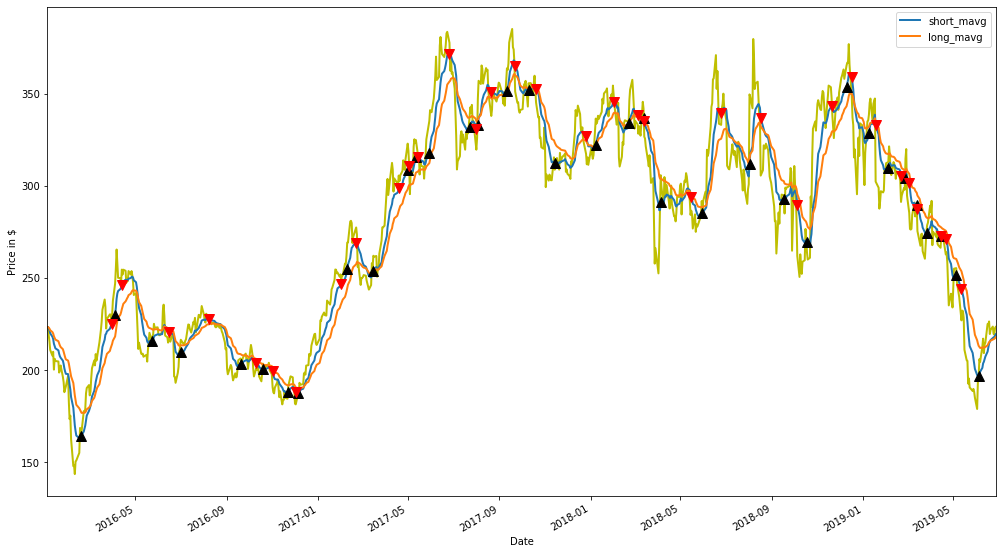

In [28]:
# Initialize the plot figure
fig = plt.figure()

# Add a subplot and label for y-axis
ax1 = fig.add_subplot(111,  ylabel='Price in $')

# Plot the closing price
tsla['Close'].plot(ax=ax1, color='y', lw=2.,figsize=(17,10))

# Plot the short and long moving averages
signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)

# Plot the buy signals
ax1.plot(signals.loc[signals.positions == 1.0].index, 
         signals.short_mavg[signals.positions == 1.0],
         '^', markersize=10, color='k')
         
# Plot the sell signals
ax1.plot(signals.loc[signals.positions == -1.0].index, 
         signals.short_mavg[signals.positions == -1.0],
         'v', markersize=10, color='r')
         
# Show the plot
plt.title('MACD')
plt.show()

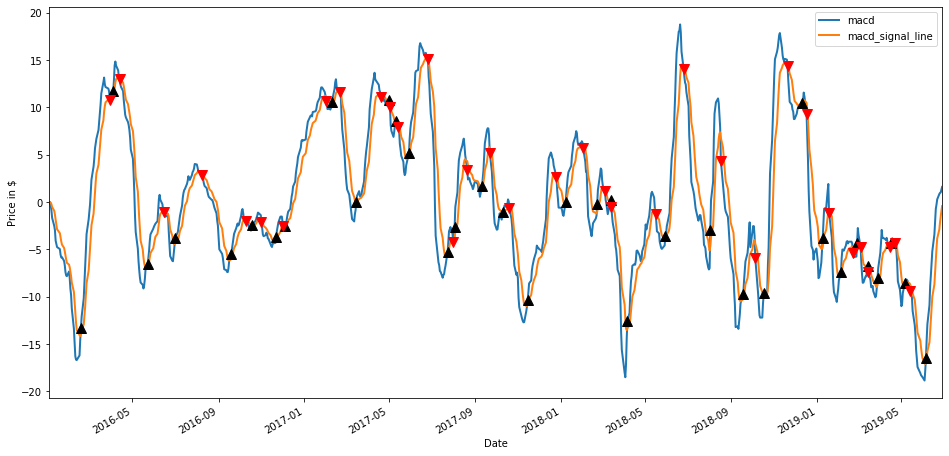

In [34]:
# Initialize the plot figure
fig = plt.figure(figsize=(16, 8))

# Add a subplot and label for y-axis
ax1 = fig.add_subplot(111,  ylabel='Price in $')

# Plot the closing price
#tsla['Close'].plot(ax=ax1, color='y', lw=2.,figsize=(17,10))

# Plot the short and long moving averages
signals[['macd', 'macd_signal_line']].plot(ax=ax1, lw=2.)

# Plot the buy signals
ax1.plot(signals.loc[signals.positions == 1.0].index, 
         signals.macd[signals.positions == 1.0],
         '^', markersize=10, color='k')
         
# Plot the sell signals
ax1.plot(signals.loc[signals.positions == -1.0].index, 
         signals.macd[signals.positions == -1.0],
         'v', markersize=10, color='r')
         
# Show the plot

plt.show()

<a id='backtesting'></a>
## Backtesting A Strategy

### Implementation Of A Simple Backtester With Pandas

In [29]:
invest = signals

invest['Holding'] = ''
invest['Cash']=''
invest['Total_Value']=''
invest['Num_shares']=''

In [30]:
#Final strategy

import math 

cash = float(10000) #N = math.floor(cash/invest['Close'][i]) -->will re-invest only 10,000$ each time and save profits
Cash = float(10000)
N = 0

for i in range(len(invest)):
    if invest['positions'][i]== 1:
        N = math.floor(Cash/invest['Close'][i])        #number of shares that can be bought at 10,000
        invest['Holding'][i] = invest['Close'][i] * N
        Cash = Cash - invest['Holding'][i]
        invest['Cash'][i] = Cash
        invest['Total_Value'][i] = Cash + invest['Holding'][i] #leftover cash plus invested amount
        invest['Num_shares'][i] = N
        
    elif invest['positions'][i]== -1 :
        Holding = invest['Close'][i] * N
        Cash = Cash + Holding
        invest['Cash'][i] = Cash
        invest['Holding'][i] = 0
        invest['Total_Value'][i] = Cash
        N = 0
        invest['Num_shares'][i] = N
        
    else:
        if invest['signal'][i] == 1:
            invest['Holding'][i] = invest['Close'][i] * N
            invest['Cash'][i]   = Cash #leftover cash from the last buy 
            invest['Total_Value'][i] = Cash + invest['Holding'][i]
            invest['Num_shares'][i] = N
            
        else:
            invest['Holding'][i] = invest['Close'][i] * N
            invest['Cash'][i]    = Cash
            invest['Total_Value'][i] = Cash
            invest['Num_shares'][i] = N
            

/Users/rishikadawkar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/rishikadawkar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/rishikadawkar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/rishikadawkar/anaconda3/lib/python3.6/site-packa

In [31]:
invest.tail(300)

,Date,Open,Close,High,Low,Volume,signal,short_mavg,long_mavg,macd,macd_signal_line,macd_Histogram,positions,Holding,Cash,Total_Value,Num_shares
Date,,,,,,,,,,,,,,,,,
2018-04-20,2018-04-20,295.170013,290.239990,299.980011,289.750000,5627900,1.0,293.847566,298.961278,-5.113712,-7.121105,2.007394,0.0,16833.9,214.343,17048.3,58
2018-04-23,2018-04-23,291.290009,283.369995,291.619995,282.329987,4893400,1.0,292.235632,297.806368,-5.570736,-6.811031,1.240296,0.0,16435.5,214.343,16649.8,58
2018-04-24,2018-04-24,285.000000,283.459991,287.089996,278.459991,5685300,1.0,290.885534,296.743673,-5.858140,-6.620453,0.762313,0.0,16440.7,214.343,16655,58
2018-04-25,2018-04-25,283.500000,280.690002,285.160004,277.250000,4013600,1.0,289.316990,295.554512,-6.237522,-6.543867,0.306345,0.0,16280,214.343,16494.4,58
2018-04-26,2018-04-26,278.750000,285.480011,285.790009,276.500000,4356000,1.0,288.726686,294.808253,-6.081567,-6.451407,0.369840,0.0,16557.8,214.343,16772.2,58
2018-04-27,2018-04-27,285.369995,294.079987,294.470001,283.829987,4364600,1.0,289.550271,294.754307,-5.204037,-6.201933,0.997896,0.0,17056.6,214.343,17271,58
2018-04-30,2018-04-30,293.609985,293.899994,298.730011,292.500000,4228200,1.0,290.219459,294.691025,-4.471566,-5.855860,1.384293,0.0,17046.2,214.343,17260.5,58
2018-05-01,2018-05-01,293.510010,299.920013,300.820007,293.220001,4625600,1.0,291.711852,295.078357,-3.366506,-5.357989,1.991483,0.0,17395.4,214.343,17609.7,58
2018-05-02,2018-05-02,298.570007,301.149994,306.850006,297.779999,8970400,1.0,293.163874,295.528108,-2.364235,-4.759238,2.395003,0.0,17466.7,214.343,17681,58


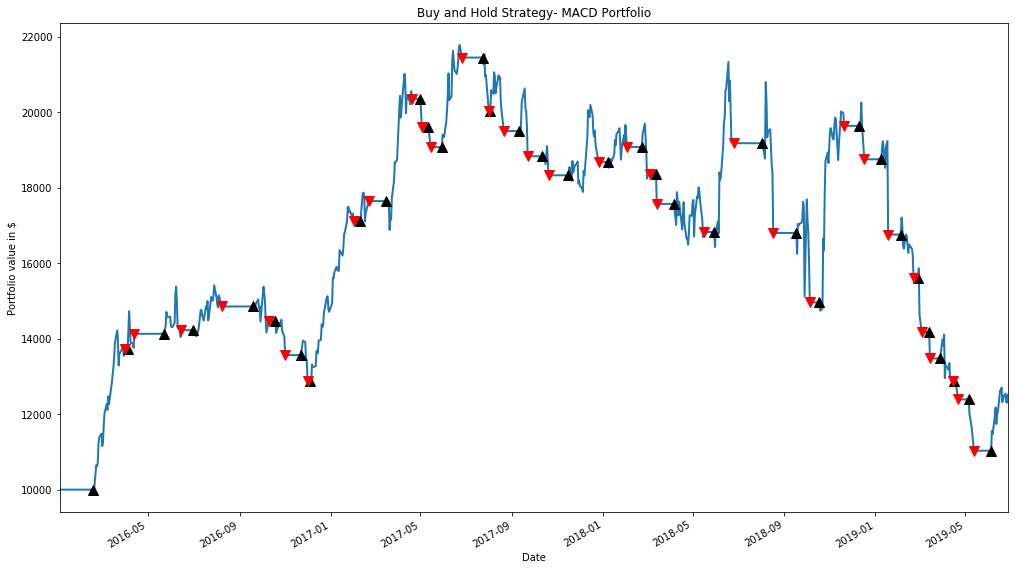

In [35]:
df = invest

import matplotlib.pyplot as plt

fig = plt.figure()

ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')

plt.title('Buy and Hold Strategy- MACD Portfolio')
# Plot the equity curve in dollars
df['Total_Value'].plot(ax=ax1, lw=2.,figsize=(17,10))


# Plot the buy signals
plt.plot(df.loc[df.positions == 1].index, 
         df.Total_Value[df.positions == 1],
         '^', markersize=10, color='k')


# Plot the sell signals
plt.plot(df.loc[df.positions == -1].index, 
         df.Total_Value[df.positions == -1],
         'v', markersize=10, color='r')

# Show the plot
plt.show()

In [37]:
invest['returns'] = invest['Total_Value'].pct_change()

invest.head(50)

,Date,Open,Close,High,Low,Volume,signal,short_mavg,long_mavg,macd,macd_signal_line,macd_Histogram,positions,Holding,Cash,Total_Value,Num_shares,returns
Date,,,,,,,,,,,,,,,,,,
2016-01-04,2016-01-04,230.720001,223.410004,231.380005,219.000000,6827100,0.0,223.410004,223.410004,0.000000,0.000000,0.000000,NaN,0,10000,10000,0,NaN
2016-01-05,2016-01-05,226.360001,223.429993,226.889999,220.000000,3186800,0.0,223.413079,223.411485,0.001595,0.000319,0.001276,0.0,0,10000,10000,0,0.000000
2016-01-06,2016-01-06,220.000000,219.039993,220.050003,215.979996,3779100,0.0,222.740297,223.087670,-0.347374,-0.069220,-0.278154,0.0,0,10000,10000,0,0.000000
2016-01-07,2016-01-07,214.190002,215.649994,218.440002,213.669998,3554300,0.0,221.649481,222.536731,-0.887251,-0.232826,-0.654425,0.0,0,10000,10000,0,0.000000
2016-01-08,2016-01-08,217.860001,211.000000,220.440002,210.770004,3628100,0.0,220.011099,221.682159,-1.671060,-0.520473,-1.150587,0.0,0,10000,10000,0,0.000000
2016-01-11,2016-01-11,214.009995,207.850006,214.449997,203.000000,4089700,0.0,218.140162,220.657555,-2.517393,-0.919857,-1.597536,0.0,0,10000,10000,0,0.000000
2016-01-12,2016-01-12,211.600006,209.970001,213.740005,205.309998,3091900,0.0,216.883214,219.865884,-2.982670,-1.332419,-1.650251,0.0,0,10000,10000,0,0.000000
2016-01-13,2016-01-13,212.009995,200.309998,212.649994,200.000000,4126400,0.0,214.333488,218.417300,-4.083812,-1.882698,-2.201114,0.0,0,10000,10000,0,0.000000
2016-01-14,2016-01-14,202.210007,206.179993,210.000000,193.380005,6490700,0.0,213.079105,217.510833,-4.431728,-2.392504,-2.039224,0.0,0,10000,10000,0,0.000000


In [38]:
# Isolate the returns of your strategy
returns = invest['returns']

# annualized 
#annualize the Sharpe ratio, since we calculated it from daily values. 
#There are 252 trading days in the year, so the simple way to annualize it is to multiply the Sharpe ratio by the square root of 252.
#Sharpe ratio
sharpe_ratio = np.sqrt(252) * (returns.mean() / returns.std())

# Print the Sharpe ratio
print(sharpe_ratio)

0.3635335120927635


# On Balance Volume

In [21]:
tsla_2=pd.read_csv("TSLA.csv")

In [22]:
tsla_2.head()

,Date,Open,Close,High,Low,Volume
0,4-Jan-16,230.720001,223.410004,231.380005,219.000000,6827100
1,5-Jan-16,226.360001,223.429993,226.889999,220.000000,3186800
2,6-Jan-16,220.000000,219.039993,220.050003,215.979996,3779100
3,7-Jan-16,214.190002,215.649994,218.440002,213.669998,3554300
4,8-Jan-16,217.860001,211.000000,220.440002,210.770004,3628100


In [23]:
tsla_2['Date'] = pd.to_datetime(tsla_2['Date'])

In [24]:
def on_balance_volume(data, close_col, vol_col, trend_periods=21):
    
    data_tmp = data.copy()
    counter = 0
    for index, row in data_tmp.iterrows():
        if counter > 0:
            last_obv = data_tmp.at[index - 1, 'obv']
            if row[close_col] > data_tmp.at[index - 1, close_col]:
                current_obv = last_obv + row[vol_col]
            elif row[close_col] < data_tmp.at[index - 1, close_col]:
                current_obv = last_obv - row[vol_col]
            else:
                current_obv = last_obv
        else:
            last_obv = 0
            current_obv = row[vol_col]
        counter += 1

        data_tmp.set_value(index, 'obv', current_obv)

    data_tmp['obv_ema' + str(trend_periods)] = data_tmp['obv'].ewm(ignore_na=False, min_periods=0, com=trend_periods, adjust=True).mean()
    
    return data_tmp

In [25]:
rez = on_balance_volume(tsla_2, 'Close', 'Volume')
rez.tail()

/Users/rishikadawkar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


,Date,Open,Close,High,Low,Volume,obv,obv_ema21
873,2019-06-24,223.240005,223.639999,225.860001,221.020004,5750800,-121877300.0,-1.126337e+08
874,2019-06-25,224.389999,219.759995,225.339996,219.490005,6182100,-128059400.0,-1.133349e+08
875,2019-06-26,220.309998,219.270004,227.229996,218.100006,8507200,-136566600.0,-1.143909e+08
876,2019-06-27,219.449997,222.839996,222.899994,217.350006,6339700,-130226900.0,-1.151107e+08
877,2019-06-28,220.990005,223.460007,225.169998,220.800003,6851400,-123375500.0,-1.154864e+08


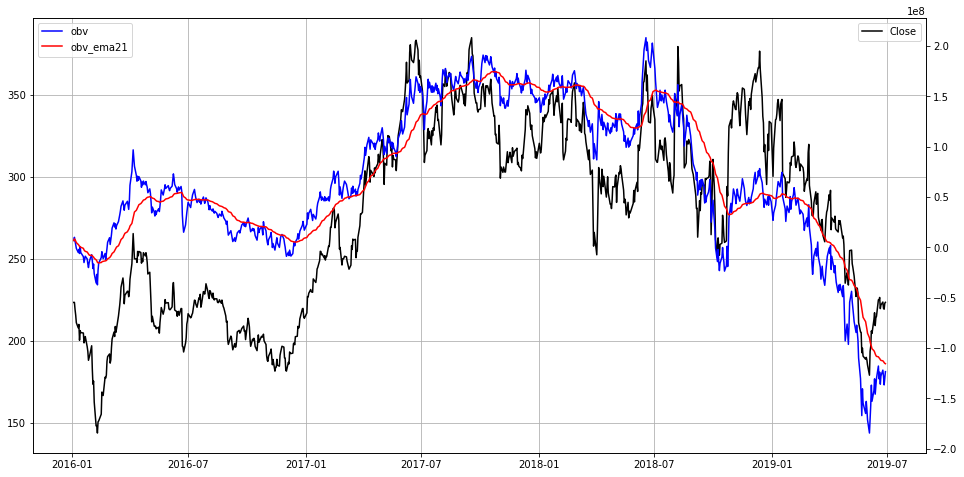

In [26]:
fig, ax = plt.subplots(figsize=(16, 8))
 
plt.plot(rez['Date'], rez['Close'], label='Close', color='black')
plt.legend(loc='upper right')
plt.grid()
 

# Get second axis
ax2 = ax.twinx()
 
plt.plot(rez['Date'],  rez['obv'], label='obv',color='blue')
plt.plot(rez['Date'],  rez['obv_ema21'], label='obv_ema21',color='red')
plt.legend(loc='upper left')
plt.show()

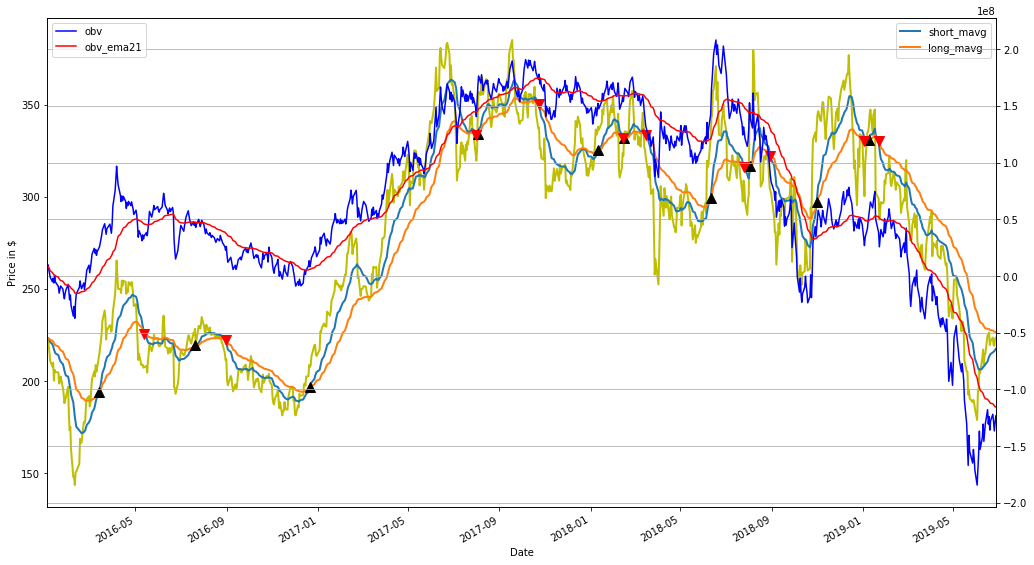

In [27]:
# Initialize the plot figure
fig = plt.figure()

# Add a subplot and label for y-axis
ax1 = fig.add_subplot(111,  ylabel='Price in $')

# Plot the closing price
tsla['Close'].plot(ax=ax1, color='y', lw=2.,figsize=(17,10))

# Plot the short and long moving averages
signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)

# Plot the buy signals
ax1.plot(signals.loc[signals.positions == 1.0].index, 
         signals.short_mavg[signals.positions == 1.0],
         '^', markersize=10, color='k')
         
# Plot the sell signals
ax1.plot(signals.loc[signals.positions == -1.0].index, 
         signals.short_mavg[signals.positions == -1.0],
         'v', markersize=10, color='r')

# Get second axis
ax2 = ax1.twinx()
 
plt.plot(rez['Date'],  rez['obv'], label='obv',color='blue')
plt.plot(rez['Date'],  rez['obv_ema21'], label='obv_ema21',color='red')
plt.legend(loc='upper left')
         
# Show the plot
plt.grid()
plt.show()

In [28]:
#Bollinger Band Strategy
print("STRATEGY 2 - BOLLINGER BANDS ")
def bollinger_strat(df,window,no_of_std):
    rolling_mean = df['Close'].rolling(window).mean()
    rolling_std = df['Close'].rolling(window).std()
    
    df['Bollinger Mean'] = rolling_mean
    df['Bollinger High'] = rolling_mean + (rolling_std * no_of_std)
    df['Bollinger Low'] = rolling_mean - (rolling_std * no_of_std)
    
    df['Short'] = None
    df['Long'] = None
    df['Position'] = None
    
    for row in range(len(df)):
    
        if (df['Close'].iloc[row] > df['Bollinger High'].iloc[row]) and (df['Close'].iloc[row-1] < df['Bollinger High'].iloc[row-1]):
            df['Position'].iloc[row] = -1
        
        if (df['Close'].iloc[row] < df['Bollinger Low'].iloc[row]) and (df['Close'].iloc[row-1] > df['Bollinger Low'].iloc[row-1]):
            df['Position'].iloc[row] = 1
            
    df['Position'].fillna(method='ffill',inplace=True)
    
    df['Market Return'] = np.log(df['Close'] / df['Close'].shift(1))
    df['Strategy Return'] = df['Market Return'] * df['Position']
  
    #df['Strategy Return'].cumsum().plot()
    #df[['Bollinger Mean','Bollinger High','Bollinger Low','Close_pred']].plot()
    plt.figure(figsize=(20,10))
    plt.title('Bollinger Bands on Tesla Stocks')
    plt.xlabel('Days')
    plt.ylabel('Stock Prices')
    plt.plot(df['Bollinger Mean'], label= 'Bollinger Mean')
    plt.plot(df['Bollinger High'], label= 'Bollinger High')
    plt.plot(df['Bollinger Low'], label= 'Bollinger Low')
    plt.plot(df['Close'], label= 'Close')
    plt.legend()
    plt.show()
    return df

STRATEGY 2 - BOLLINGER BANDS 


/Users/rishikadawkar/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:202: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


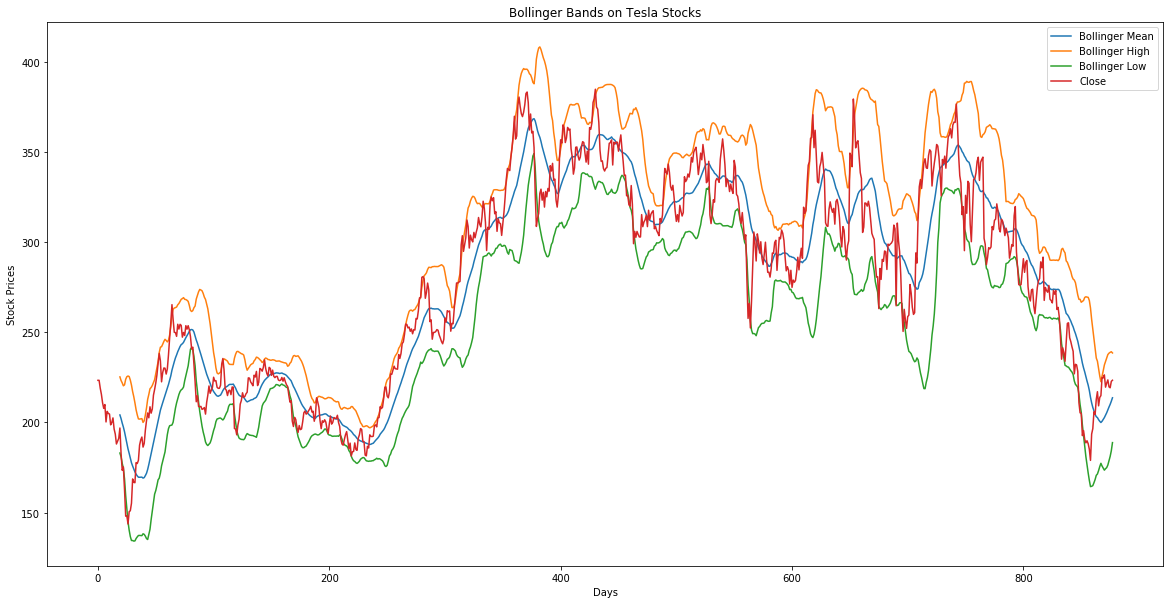

In [29]:
invest = bollinger_strat(tsla_2,20,2)

In [75]:
#buy 1, signal 0
action = []
signal = 0
for i in range(len(invest)):
    if invest['Close'][i] < invest['Bollinger Low'][i]:
        if signal == 0:
            invest['Action'][i]='Buy'
            invest['Signal'][i] = 1
            signal = 1
        else: 
            invest['Action'][i]='Bought In'
            invest['Signal'][i] = 2
    else:
        invest['Action'][i]='Not in'
        invest['Signal'][i] = 2
        
            
    if invest['Close'][i]> invest['Bollinger High'][i]:
        if signal == 1:
            invest['Action'][i]='Sell'
            invest['Signal'][i] = 0
            signal = 0
        else:
            invest['Action'][i]='Sold No action'
            invest['Signal'][i] = 3
    else:
        action.append('Sold No action')
        invest['Signal'][i] = 3
invest.head(500)

/Users/rishikadawkar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/rishikadawkar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/Users/rishikadawkar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/rish

,Date,Open,Close,High,Low,Volume,Bollinger Mean,Bollinger High,Bollinger Low,Short,Long,Position,Market Return,Strategy Return,Signal,Action
0,2016-01-04,230.720001,223.410004,231.380005,219.000000,6827100,NaN,NaN,NaN,None,None,NaN,NaN,NaN,3,Not in
1,2016-01-05,226.360001,223.429993,226.889999,220.000000,3186800,NaN,NaN,NaN,None,None,NaN,0.000089,NaN,3,Not in
2,2016-01-06,220.000000,219.039993,220.050003,215.979996,3779100,NaN,NaN,NaN,None,None,NaN,-0.019844,NaN,3,Not in
3,2016-01-07,214.190002,215.649994,218.440002,213.669998,3554300,NaN,NaN,NaN,None,None,NaN,-0.015598,NaN,3,Not in
4,2016-01-08,217.860001,211.000000,220.440002,210.770004,3628100,NaN,NaN,NaN,None,None,NaN,-0.021799,NaN,3,Not in
5,2016-01-11,214.009995,207.850006,214.449997,203.000000,4089700,NaN,NaN,NaN,None,None,NaN,-0.015041,NaN,3,Not in
6,2016-01-12,211.600006,209.970001,213.740005,205.309998,3091900,NaN,NaN,NaN,None,None,NaN,0.010148,NaN,3,Not in
7,2016-01-13,212.009995,200.309998,212.649994,200.000000,4126400,NaN,NaN,NaN,None,None,NaN,-0.047099,NaN,3,Not in
8,2016-01-14,202.210007,206.179993,210.000000,193.380005,6490700,NaN,NaN,NaN,None,None,NaN,0.028883,NaN,3,Not in
9,2016-01-15,198.970001,204.990005,205.070007,197.250000,5578600,NaN,NaN,NaN,None,None,NaN,-0.005788,NaN,3,Not in


In [70]:

invest[(invest['Action']==0)|(invest['Action']==1)]

,Date,Open,Close,High,Low,Volume,Bollinger Mean,Bollinger High,Bollinger Low,Short,Long,Position,Market Return,Strategy Return,Signal,Action
21,2016-02-03,183.589996,173.479996,183.940002,170.179993,7931400,199.652000,221.990736,177.313263,None,None,1.0,-0.052221,-0.052221,,1
63,2016-04-05,240.500000,255.470001,256.559998,240.000000,9948700,225.926501,253.411792,198.441209,None,None,-1.0,0.033757,-0.033757,,0
81,2016-04-29,248.139999,240.759995,248.429993,237.809998,5413800,251.627502,261.614320,241.640685,None,None,1.0,-0.028458,-0.028458,,1
107,2016-06-07,222.240005,232.339996,234.440002,221.520004,6213600,216.389000,230.880431,201.897569,None,None,-1.0,0.051488,-0.051488,,0
118,2016-06-22,199.470001,196.660004,205.949997,195.750000,23742400,220.253499,235.709986,204.797012,None,None,1.0,-0.110377,-0.110377,,1
189,2016-10-03,212.300003,213.699997,215.669998,208.250000,5999900,203.126500,212.944112,193.308888,None,None,-1.0,0.046306,-0.046306,,0
210,2016-11-01,198.039993,190.789993,198.500000,188.110001,7060000,200.051500,207.651959,192.451041,None,None,1.0,-0.035729,-0.035729,,1
244,2016-12-20,203.050003,208.789993,209.000000,202.500000,4689100,193.526498,207.346541,179.706455,None,None,-1.0,0.029454,-0.029454,,0
378,2017-07-05,347.200012,327.089996,347.239990,326.329987,17046700,367.349997,393.422054,341.277940,None,None,1.0,-0.075156,-0.075156,,1
400,2017-08-04,347.000000,356.910004,357.269989,343.299988,9268900,331.190001,351.864805,310.515197,None,None,-1.0,0.027900,-0.027900,,0


In [98]:
#buy 1, signal 0
state = 0
for i in range(len(invest)):
    if invest['Close'][i] < invest['Bollinger Low'][i]:
        if state == 0:
            state = 1
            invest['Position'][i]='Buy'
            invest['Signal'][i] = state
            
        else: 
            invest['Signal'][i] = state
        
            
    elif invest['Close'][i]> invest['Bollinger High'][i]:
        if state == 1:
            invest['Position'][i]='Sell'
            state = 0
            invest['Signal'][i] = state
            
        else:
            invest['Signal'][i] = state
    else:
        invest['Signal'][i] = state

invest.head(50)

/Users/rishikadawkar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/rishikadawkar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/rishikadawkar/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:202: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, va

,Date,Open,Close,High,Low,Volume,Bollinger Mean,Bollinger High,Bollinger Low,Short,Long,Position,Market Return,Strategy Return,Signal,Action
0,2016-01-04,230.720001,223.410004,231.380005,219.000000,6827100,NaN,NaN,NaN,None,None,NaN,NaN,NaN,0,Not in
1,2016-01-05,226.360001,223.429993,226.889999,220.000000,3186800,NaN,NaN,NaN,None,None,NaN,0.000089,NaN,0,Not in
2,2016-01-06,220.000000,219.039993,220.050003,215.979996,3779100,NaN,NaN,NaN,None,None,NaN,-0.019844,NaN,0,Not in
3,2016-01-07,214.190002,215.649994,218.440002,213.669998,3554300,NaN,NaN,NaN,None,None,NaN,-0.015598,NaN,0,Not in
4,2016-01-08,217.860001,211.000000,220.440002,210.770004,3628100,NaN,NaN,NaN,None,None,NaN,-0.021799,NaN,0,Not in
5,2016-01-11,214.009995,207.850006,214.449997,203.000000,4089700,NaN,NaN,NaN,None,None,NaN,-0.015041,NaN,0,Not in
6,2016-01-12,211.600006,209.970001,213.740005,205.309998,3091900,NaN,NaN,NaN,None,None,NaN,0.010148,NaN,0,Not in
7,2016-01-13,212.009995,200.309998,212.649994,200.000000,4126400,NaN,NaN,NaN,None,None,NaN,-0.047099,NaN,0,Not in
8,2016-01-14,202.210007,206.179993,210.000000,193.380005,6490700,NaN,NaN,NaN,None,None,NaN,0.028883,NaN,0,Not in
9,2016-01-15,198.970001,204.990005,205.070007,197.250000,5578600,NaN,NaN,NaN,None,None,NaN,-0.005788,NaN,0,Not in


In [99]:
invest.head(70)

,Date,Open,Close,High,Low,Volume,Bollinger Mean,Bollinger High,Bollinger Low,Short,Long,Position,Market Return,Strategy Return,Signal,Action
0,2016-01-04,230.720001,223.410004,231.380005,219.000000,6827100,NaN,NaN,NaN,None,None,NaN,NaN,NaN,0,Not in
1,2016-01-05,226.360001,223.429993,226.889999,220.000000,3186800,NaN,NaN,NaN,None,None,NaN,0.000089,NaN,0,Not in
2,2016-01-06,220.000000,219.039993,220.050003,215.979996,3779100,NaN,NaN,NaN,None,None,NaN,-0.019844,NaN,0,Not in
3,2016-01-07,214.190002,215.649994,218.440002,213.669998,3554300,NaN,NaN,NaN,None,None,NaN,-0.015598,NaN,0,Not in
4,2016-01-08,217.860001,211.000000,220.440002,210.770004,3628100,NaN,NaN,NaN,None,None,NaN,-0.021799,NaN,0,Not in
5,2016-01-11,214.009995,207.850006,214.449997,203.000000,4089700,NaN,NaN,NaN,None,None,NaN,-0.015041,NaN,0,Not in
6,2016-01-12,211.600006,209.970001,213.740005,205.309998,3091900,NaN,NaN,NaN,None,None,NaN,0.010148,NaN,0,Not in
7,2016-01-13,212.009995,200.309998,212.649994,200.000000,4126400,NaN,NaN,NaN,None,None,NaN,-0.047099,NaN,0,Not in
8,2016-01-14,202.210007,206.179993,210.000000,193.380005,6490700,NaN,NaN,NaN,None,None,NaN,0.028883,NaN,0,Not in
9,2016-01-15,198.970001,204.990005,205.070007,197.250000,5578600,NaN,NaN,NaN,None,None,NaN,-0.005788,NaN,0,Not in


In [58]:
# Calculating Short and Long Positions
investment = invest  #.iloc[:,[0,1,2,3,4,5]]  #took the 6 columns, date, open, close, high, low, volume
#investment = investment.dropna()
investment['Action'] = ''

investment.tail()

,Date,Open,Close,High,Low,Volume,Bollinger Mean,Bollinger High,Bollinger Low,Short,Long,Position,Market Return,Strategy Return,Signal,Action
873,2019-06-24,223.240005,223.639999,225.860001,221.020004,5750800,207.0470,237.708871,176.385129,None,None,1.0,0.007991,0.007991,,
874,2019-06-25,224.389999,219.759995,225.339996,219.490005,6182100,208.6000,238.485697,178.714303,None,None,1.0,-0.017502,-0.017502,,
875,2019-06-26,220.309998,219.270004,227.229996,218.100006,8507200,210.0705,238.951015,181.189985,None,None,1.0,-0.002232,-0.002232,,
876,2019-06-27,219.449997,222.839996,222.899994,217.350006,6339700,211.8015,239.283889,184.319111,None,None,1.0,0.016150,0.016150,,
877,2019-06-28,220.990005,223.460007,225.169998,220.800003,6851400,213.7165,238.596825,188.836176,None,None,1.0,0.002778,0.002778,,


In [105]:
import math 

Cash = float(10000)

for i in range(len(invest)):
    if invest['Position'][i]== 'Buy':
        N = math.floor(cash/invest['Close'][i])        #number of shares that can be bought at 10,000
        Holding = invest['Close'][i] * N
        Cash = Cash - Holding
    if invest['Position'][i]== 'Sell':
        Holding = invest['Close'][i] * N
        Cash = Cash + Holding

In [109]:
Cash

11387.019638999998

In [133]:
import math 

Cash = float(10000)
N = 0

for i in range(len(invest)):
    if invest['Position'][i]== 'Buy':
        N = math.floor(cash/invest['Close'][i])        #number of shares that can be bought at 10,000
        invest['Holding'][i] = invest['Close'][i] * N
        Cash = Cash - invest['Holding'][i]
        invest['Cash'][i] = Cash
        invest['Total_Value'][i] = Cash + invest['Holding'][i] #leftover cash plus invested amount
        
    elif invest['Position'][i]== 'Sell':
        Holding = invest['Close'][i] * N
        Cash = Cash + Holding
        invest['Cash'][i] = Cash
        invest['Holding'][i] = 0
        invest['Total_Value'][i] = Cash
        N = 0
        
    else:
        if invest['Signal'][i] == 1:
            invest['Holding'][i] = invest['Close'][i] * N
            invest['Cash'][i]   = Cash #leftover cash from the last buy 
            invest['Total_Value'][i] = Cash + invest['Holding'][i]
        else:
            invest['Holding'][i] = invest['Close'][i] * N
            invest['Cash'][i]    = Cash
            invest['Total_Value'][i] = Cash

/Users/rishikadawkar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/rishikadawkar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/rishikadawkar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/rishikadawkar/anaconda3/lib/python3.6/site-packa

In [140]:
invest.head(130)

,Date,Open,Close,High,Low,Volume,Bollinger Mean,Bollinger High,Bollinger Low,Short,Long,Position,Market Return,Strategy Return,Signal,Action,Holding,Cash,Total_Value
0,2016-01-04,230.720001,223.410004,231.380005,219.000000,6827100,NaN,NaN,NaN,None,None,NaN,NaN,NaN,0,Not in,0.000000,10000.000000,10000.000000
1,2016-01-05,226.360001,223.429993,226.889999,220.000000,3186800,NaN,NaN,NaN,None,None,NaN,0.000089,NaN,0,Not in,0.000000,10000.000000,10000.000000
2,2016-01-06,220.000000,219.039993,220.050003,215.979996,3779100,NaN,NaN,NaN,None,None,NaN,-0.019844,NaN,0,Not in,0.000000,10000.000000,10000.000000
3,2016-01-07,214.190002,215.649994,218.440002,213.669998,3554300,NaN,NaN,NaN,None,None,NaN,-0.015598,NaN,0,Not in,0.000000,10000.000000,10000.000000
4,2016-01-08,217.860001,211.000000,220.440002,210.770004,3628100,NaN,NaN,NaN,None,None,NaN,-0.021799,NaN,0,Not in,0.000000,10000.000000,10000.000000
5,2016-01-11,214.009995,207.850006,214.449997,203.000000,4089700,NaN,NaN,NaN,None,None,NaN,-0.015041,NaN,0,Not in,0.000000,10000.000000,10000.000000
6,2016-01-12,211.600006,209.970001,213.740005,205.309998,3091900,NaN,NaN,NaN,None,None,NaN,0.010148,NaN,0,Not in,0.000000,10000.000000,10000.000000
7,2016-01-13,212.009995,200.309998,212.649994,200.000000,4126400,NaN,NaN,NaN,None,None,NaN,-0.047099,NaN,0,Not in,0.000000,10000.000000,10000.000000
8,2016-01-14,202.210007,206.179993,210.000000,193.380005,6490700,NaN,NaN,NaN,None,None,NaN,0.028883,NaN,0,Not in,0.000000,10000.000000,10000.000000
9,2016-01-15,198.970001,204.990005,205.070007,197.250000,5578600,NaN,NaN,NaN,None,None,NaN,-0.005788,NaN,0,Not in,0.000000,10000.000000,10000.000000


In [149]:
import math 

cash = float(10000) #N = math.floor(cash/invest['Close'][i]) -->will re-invest only 10,000$ each time and save profits
Cash = float(10000)
N = 0

for i in range(len(invest)):
    if invest['Position'][i]== 'Buy':
        N = math.floor(Cash/invest['Close'][i])        #number of shares that can be bought at 10,000
        invest['Holding'][i] = invest['Close'][i] * N
        Cash = Cash - invest['Holding'][i]
        invest['Cash'][i] = Cash
        invest['Total_Value'][i] = Cash + invest['Holding'][i] #leftover cash plus invested amount
        invest['Num_shares'][i] = N
        
    elif invest['Position'][i]== 'Sell':
        Holding = invest['Close'][i] * N
        Cash = Cash + Holding
        invest['Cash'][i] = Cash
        invest['Holding'][i] = 0
        invest['Total_Value'][i] = Cash
        N = 0
        invest['Num_shares'][i] = N
        
    else:
        if invest['Signal'][i] == 1:
            invest['Holding'][i] = invest['Close'][i] * N
            invest['Cash'][i]   = Cash #leftover cash from the last buy 
            invest['Total_Value'][i] = Cash + invest['Holding'][i]
            invest['Num_shares'][i] = N
            
        else:
            invest['Holding'][i] = invest['Close'][i] * N
            invest['Cash'][i]    = Cash
            invest['Total_Value'][i] = Cash
            invest['Num_shares'][i] = N
            

/Users/rishikadawkar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/rishikadawkar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/rishikadawkar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/rishikadawkar/anaconda3/lib/python3.6/site-packa

In [151]:
invest.tail(100)

,Date,Open,Close,High,Low,Volume,Bollinger Mean,Bollinger High,Bollinger Low,Short,Long,Position,Market Return,Strategy Return,Signal,Action,Holding,Cash,Total_Value,Num_shares
778,2019-02-06,319.589996,317.220001,324.239990,315.619995,5038500,317.678500,359.882178,275.474823,None,None,1,-0.012935,-0.012935,1,Not in,26963.700085,155.588953,27119.289038,85
779,2019-02-07,313.299988,307.510010,314.700012,303.000000,6520600,316.127501,357.373784,274.881218,None,None,1,-0.031088,-0.031088,1,Not in,26138.350850,155.588953,26293.939803,85
780,2019-02-08,306.829987,305.799988,307.450012,298.500000,5844200,314.169000,353.315200,275.022800,None,None,1,-0.005576,-0.005576,1,Not in,25992.998980,155.588953,26148.587933,85
781,2019-02-11,311.600006,312.839996,318.600006,310.500000,7129700,312.448000,348.361736,276.534263,None,None,1,0.022761,0.022761,1,Not in,26591.399660,155.588953,26746.988613,85
782,2019-02-12,316.200012,311.809998,318.190002,309.619995,5517600,311.318500,345.714138,276.922861,None,None,1,-0.003298,-0.003298,1,Not in,26503.849830,155.588953,26659.438783,85
783,2019-02-13,312.350006,308.170013,312.750000,305.570007,5141600,309.505501,340.172944,278.838057,None,None,1,-0.011742,-0.011742,1,Not in,26194.451105,155.588953,26350.040058,85
784,2019-02-14,303.380005,303.769989,306.769989,301.000000,5200800,307.391501,332.836401,281.946601,None,None,1,-0.014381,-0.014381,1,Not in,25820.449065,155.588953,25976.038018,85
785,2019-02-15,304.500000,307.880005,308.000000,303.899994,3904900,305.420001,322.614676,288.225326,None,None,1,0.013439,0.013439,1,Not in,26169.800425,155.588953,26325.389378,85
786,2019-02-19,306.559998,305.640015,311.540009,305.470001,4168400,305.589001,322.719225,288.458778,None,None,1,-0.007302,-0.007302,1,Not in,25979.401275,155.588953,26134.990228,85
787,2019-02-20,304.410004,302.559998,306.299988,299.000000,7142100,305.771001,322.678792,288.863210,None,None,1,-0.010128,-0.010128,1,Not in,25717.599830,155.588953,25873.188783,85


In [32]:
diff_sell = np.subtract(investment['Close'],investment['Bollinger High'])

diff_sell.tail()

873   -14.068872
874   -18.725702
875   -19.681011
876   -16.443893
877   -15.136818
dtype: float64

In [33]:
diff_sell = np.sign(diff_sell)
diff_sell.head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
dtype: float64

In [34]:
ind_list_sell = []
for i in range(0,len(diff_sell)-1):
   if (diff_sell[i] != diff_sell[i+1]): # Close crosses Bollinger high, create a signal to sell
       ind_list_sell.append(i+1) # array of row numbers at which sell signal is created
       investment.iloc[i+1,14] = 'Sell'

ind_list_sell

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 63,
 65,
 107,
 109,
 189,
 190,
 244,
 245,
 248,
 249,
 266,
 267,
 278,
 279,
 280,
 282,
 309,
 312,
 314,
 316,
 333,
 334,
 353,
 355,
 358,
 361,
 400,
 403,
 428,
 431,
 489,
 492,
 610,
 617,
 650,
 652,
 653,
 654,
 709,
 712,
 742,
 743]

In [35]:
investment.head()

,Date,Open,Close,High,Low,Volume,Bollinger Mean,Bollinger High,Bollinger Low,Short,Long,Position,Market Return,Strategy Return,Signal
0,2016-01-04,230.720001,223.410004,231.380005,219.000000,6827100,NaN,NaN,NaN,None,None,NaN,NaN,NaN,
1,2016-01-05,226.360001,223.429993,226.889999,220.000000,3186800,NaN,NaN,NaN,None,None,NaN,0.000089,NaN,Sell
2,2016-01-06,220.000000,219.039993,220.050003,215.979996,3779100,NaN,NaN,NaN,None,None,NaN,-0.019844,NaN,Sell
3,2016-01-07,214.190002,215.649994,218.440002,213.669998,3554300,NaN,NaN,NaN,None,None,NaN,-0.015598,NaN,Sell
4,2016-01-08,217.860001,211.000000,220.440002,210.770004,3628100,NaN,NaN,NaN,None,None,NaN,-0.021799,NaN,Sell


In [36]:
# =============================================================================
# 
# for i in ind_list_sell:
#     print(investment.iloc[i])
# =============================================================================

diff_buy = np.subtract(investment['Close'],investment['Bollinger Low'])
diff_buy = np.sign(diff_buy)
ind_list_buy = []
for i in range(0,len(diff_buy)-1):
   if (diff_buy[i] != diff_buy[i+1]):
       ind_list_buy.append(i+1)
       investment.iloc[i+1,14] = 'Buy'


ind_list_buy

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 21,
 22,
 23,
 27,
 81,
 82,
 83,
 88,
 118,
 121,
 165,
 170,
 210,
 213,
 378,
 381,
 457,
 460,
 463,
 464,
 529,
 531,
 561,
 565,
 647,
 648,
 675,
 676,
 690,
 691,
 695,
 697,
 747,
 748,
 749,
 750,
 795,
 798,
 832,
 834,
 848,
 852]

In [37]:
# =============================================================================
# for i in ind_list_buy:
#     print(investment.iloc[i])
# =============================================================================

#%%

print(" ")  
total_money2 = float(10000)
    
#input('How much money you want to invest using Bollinger Bands Strategy? '))
#if total_money2<170:
#     total_money2 = float(input('Come on, one Apple share is at least $170, How much you can invest in us? '))

print(" ")  
print('Assuming we have initially bought shares at price $170 per share with half of our initial investment')
sold = []
bought = []
returns = []
#bought_amt = 0.5*total_money2
#no_of_shares = bought_amt/170
no_of_shares = floor(total_money2/price)
bought_amt = no_of_shares*price

rem_amt = total_money2 - bought_amt
#money2 = 0

for i in ind_list_sell:
    sell = investment.iloc[i]
    s = 0.30*no_of_shares*(sell['Close_pred'])
    no_of_shares = no_of_shares - 0.30*no_of_shares
    sold.append(s)
    returns.append(sell['Close_pred'] - 170)

for i in ind_list_buy:
    buy = investment.iloc[i]
    shares = 0.40*rem_amt/buy['Close_pred']
    rem_amt = rem_amt - shares*buy['Close_pred']
    tshare = no_of_shares + shares
    bought.append(shares*buy['Close_pred'])

sh = sum(sold)
lg = sum(bought)
price = sell['Close_pred']
share_rem = no_of_shares*sell['Close_pred']
money2 = rem_amt + sh + lg + share_rem
profit2 = round(money2 - total_money2,2)
return_rate2 = round(profit2*100/total_money2,2)   

#trading_days2 = len(investment)
std_close2 = np.std(returns)

sharpe_ratio2 = (np.mean(returns)*365)/(std_close2*trading_days)

print(" ") 
print('''Assuming we have $''' ,total_money2,''' to invest using Bollinger Bands, based on the approximate price of  $170 per share,

Then We can help you earn a profit of $''',round(profit2,2),
'''.\nThe return rate is: ''',return_rate2,'%  for the past 3 months.'
         )
print(" ")
print('Sharpe Ratio using Bollinger Bands: ', round(sharpe_ratio2,2))
#%%



 
 
Assuming we have initially bought shares at price $170 per share with half of our initial investment


NameError: name 'floor' is not defined